In [1]:
import matplotlib.pyplot as plt
import h5py
import numpy as np
import pandas as pd
import phase2_common as ph2
from s4bb.spectra import XSpec, CalcSpec_namaster

In [2]:
params_V = np.load('mlsearch/ph2_mlsearch_f1_y20_n3_full_withpbs_V.npy')
params_V = params_V.T
params_V.shape

(100, 12)

In [3]:
df_V = pd.DataFrame(params_V, columns = ['status', 'fval', 'r', 'A_d', 'alpha_d', 'beta_d', 'A_s', 'alpha_s', 'beta_s', 'epsilon', 'Delta_d', 'Detla_s'])
pd.set_option('display.max_rows', 100)
df_V

,status,fval,r,A_d,alpha_d,beta_d,A_s,alpha_s,beta_s,epsilon,Delta_d,Detla_s
0,0.0,37.621859,0.000988,23.711010,-1.159462,1.600464,0.989936,-0.105628,-3.136271,-0.001804,1.000417,0.998694
1,0.0,365.084259,0.000958,14.364084,-0.838507,1.656249,1.091398,-1.007304,-3.093377,0.005800,0.999533,0.999496
2,0.0,108.874437,0.002517,7.644014,-0.413427,1.727622,1.078645,-1.264809,-3.080957,0.127698,0.998532,0.998196
3,0.0,406.594923,0.000273,13.746749,-0.773996,1.646800,1.055115,-0.915254,-3.108021,0.028304,0.999668,0.999180
4,0.0,331.637632,0.000537,14.104126,-0.745862,1.629921,0.943080,-0.682558,-3.081223,-0.011904,1.000693,0.999607
5,0.0,228.566966,0.000576,13.093059,-0.812917,1.694464,1.194981,-1.381692,-3.070744,0.122283,0.999104,0.999328
6,0.0,384.979708,0.000365,13.763636,-0.735521,1.628757,1.096501,-0.931683,-3.093846,-0.014776,1.000073,0.999242
7,0.0,304.035895,0.001175,16.502446,-0.876054,1.615648,0.939501,-0.561080,-3.097277,-0.021691,1.000635,0.999635
8,0.0,379.779893,-0.000284,15.279252,-0.875075,1.647605,1.044317,-0.914075,-3.088405,0.020292,0.999045,0.999014
9,0.0,335.146764,0.000194,16.894745,-0.879493,1.618655,0.983778,-0.696023,-3.108755,-0.065392,1.000283,0.999457


In [4]:
df_V_clean = df_V.drop([26, 27, 77])
df_V_clean

,status,fval,r,A_d,alpha_d,beta_d,A_s,alpha_s,beta_s,epsilon,Delta_d,Detla_s
0,0.0,37.621859,0.000988,23.711010,-1.159462,1.600464,0.989936,-0.105628,-3.136271,-0.001804,1.000417,0.998694
1,0.0,365.084259,0.000958,14.364084,-0.838507,1.656249,1.091398,-1.007304,-3.093377,0.005800,0.999533,0.999496
2,0.0,108.874437,0.002517,7.644014,-0.413427,1.727622,1.078645,-1.264809,-3.080957,0.127698,0.998532,0.998196
3,0.0,406.594923,0.000273,13.746749,-0.773996,1.646800,1.055115,-0.915254,-3.108021,0.028304,0.999668,0.999180
4,0.0,331.637632,0.000537,14.104126,-0.745862,1.629921,0.943080,-0.682558,-3.081223,-0.011904,1.000693,0.999607
5,0.0,228.566966,0.000576,13.093059,-0.812917,1.694464,1.194981,-1.381692,-3.070744,0.122283,0.999104,0.999328
6,0.0,384.979708,0.000365,13.763636,-0.735521,1.628757,1.096501,-0.931683,-3.093846,-0.014776,1.000073,0.999242
7,0.0,304.035895,0.001175,16.502446,-0.876054,1.615648,0.939501,-0.561080,-3.097277,-0.021691,1.000635,0.999635
8,0.0,379.779893,-0.000284,15.279252,-0.875075,1.647605,1.044317,-0.914075,-3.088405,0.020292,0.999045,0.999014
9,0.0,335.146764,0.000194,16.894745,-0.879493,1.618655,0.983778,-0.696023,-3.108755,-0.065392,1.000283,0.999457


In [5]:
df_V_clean.describe()

,status,fval,r,A_d,alpha_d,beta_d,A_s,alpha_s,beta_s,epsilon,Delta_d,Detla_s
count,97.0,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,0.0,135.141642,0.000866,13.925433,-0.739081,1.665110,1.057855,-0.872951,-3.076908,0.029197,1.000185,0.995507
std,0.0,572.226088,0.002738,5.179816,0.300485,0.100622,0.391437,0.381952,0.131789,0.077853,0.010725,0.034213
min,0.0,-4457.486103,-0.015340,1.305401,-1.480377,1.210470,0.465533,-2.000000,-3.231758,-0.164364,0.969845,0.662165
25%,0.0,162.557039,0.000242,12.154691,-0.876054,1.620421,0.947858,-1.024154,-3.110870,-0.026392,0.998670,0.998720
50%,0.0,283.753981,0.000528,13.746749,-0.773996,1.647605,1.007026,-0.933476,-3.097888,0.023877,0.999350,0.999155
75%,0.0,356.244265,0.001070,15.882947,-0.683520,1.681944,1.065389,-0.682558,-3.082022,0.091670,1.000417,0.999525
max,0.0,417.326438,0.015358,38.116466,0.500000,2.000000,3.496299,0.347290,-2.189465,0.233110,1.100000,1.000338


In [6]:
df_V.describe()

,status,fval,r,A_d,alpha_d,beta_d,A_s,alpha_s,beta_s,epsilon,Delta_d,Detla_s
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.060000,-2862.011940,0.532225,13.692379,-0.717893,1.671666,1.056663,-0.894887,-3.071571,0.022206,1.001934,0.988652
std,0.342893,23573.813985,5.313739,5.485316,0.341108,0.109737,0.403478,0.408263,0.148808,0.117602,0.016228,0.059077
min,0.000000,-225586.352377,-0.015340,0.000020,-1.480377,1.210470,0.447348,-2.000000,-3.248107,-0.835752,0.969845,0.640309
25%,0.000000,138.063463,0.000239,11.763470,-0.876914,1.620664,0.945365,-1.039685,-3.110943,-0.026548,0.998670,0.998694
50%,0.000000,279.899144,0.000532,13.732996,-0.771081,1.648446,1.005390,-0.933976,-3.097611,0.022085,0.999415,0.999154
75%,0.000000,355.719753,0.001085,16.037822,-0.679552,1.685195,1.066966,-0.692657,-3.081156,0.091841,1.000433,0.999503
max,2.000000,417.326438,53.138231,38.116466,0.500000,2.000000,3.496299,0.347290,-2.189465,0.235248,1.100000,1.000338


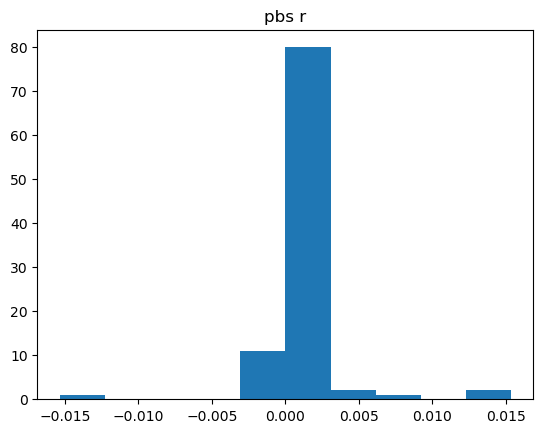

In [7]:
plt.hist(df_V_clean['r'])
plt.title('pbs r')
plt.show()

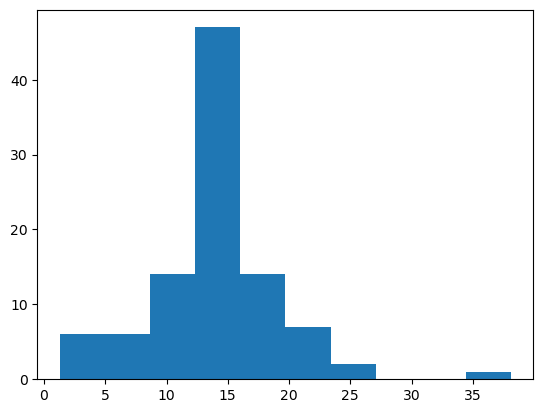

In [8]:
plt.hist(df_V_clean['A_d'])
plt.show()

In [9]:
params_C = np.load('mlsearch/ph2_mlsearch_f1_y20_n3_full_withpbs_C.npy')
params_C = params_C.T
params_C.shape

(100, 12)

In [10]:
df_C = pd.DataFrame(params_C, columns = ['status', 'fval', 'r', 'A_d', 'alpha_d', 'beta_d', 'A_s', 'alpha_s', 'beta_s', 'epsilon', 'Delta_d', 'Detla_s'])
pd.set_option('display.max_rows', 100)
df_C

,status,fval,r,A_d,alpha_d,beta_d,A_s,alpha_s,beta_s,epsilon,Delta_d,Detla_s
0,0.0,47.650959,0.000659,1.770566e+01,-0.888561,1.602589,0.853994,-0.574263,-3.112706,-0.085608,1.000606,0.998662
1,0.0,365.605449,0.000989,1.372101e+01,-0.802062,1.657576,1.043833,-0.981729,-3.093220,0.014379,0.999476,0.999448
2,0.0,102.619801,0.002904,7.312997e+00,-0.381476,1.733721,1.084046,-1.293453,-3.078512,0.133231,0.998635,0.998151
3,0.0,412.908854,0.000118,1.369678e+01,-0.751766,1.644274,1.117675,-1.079273,-3.108383,0.027074,0.999451,0.998563
4,0.0,269.448675,0.000611,1.871153e+01,-1.097807,1.622686,0.910500,-0.732543,-3.059309,0.045557,1.000488,0.999805
5,0.0,227.569409,0.000562,1.318650e+01,-0.818434,1.694300,1.191388,-1.362045,-3.072101,0.115351,0.999105,0.999324
6,0.0,316.578873,0.000730,2.186035e+01,-1.221953,1.610399,0.951674,-0.588540,-3.125965,-0.057050,1.000395,0.998785
7,0.0,303.310202,0.001443,1.782805e+01,-0.938058,1.619215,0.930849,-0.604630,-3.156577,-0.069899,1.000602,0.999379
8,0.0,379.730549,-0.000285,1.526878e+01,-0.873725,1.647600,1.045640,-0.916600,-3.088273,0.019971,0.999044,0.999015
9,0.0,329.129822,0.000342,2.059594e+01,-1.020564,1.618005,1.271475,-0.842948,-3.124130,0.008492,1.000340,0.999731


In [12]:
df_C_clean = df_C.drop([48])
df_C_clean.describe()

,status,fval,r,A_d,alpha_d,beta_d,A_s,alpha_s,beta_s,epsilon,Delta_d,Detla_s
count,99.0,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,0.0,-33.319388,0.001340,13.880995,-0.725113,1.666733,1.003677,-0.887495,-3.075636,0.005317,1.004447,0.982498
std,0.0,1128.282134,0.003784,5.245621,0.365991,0.104262,0.276663,0.404387,0.180799,0.161340,0.022379,0.072578
min,0.0,-5280.762493,-0.015318,1.307257,-1.394470,1.213622,0.373112,-2.000000,-3.393195,-1.000000,0.969378,0.634251
25%,0.0,162.358895,0.000230,12.309246,-0.894593,1.618690,0.927411,-1.009223,-3.114123,-0.033333,0.998926,0.998717
50%,0.0,286.892439,0.000655,13.924356,-0.786003,1.647519,0.991217,-0.930835,-3.101185,0.015589,0.999659,0.999176
75%,0.0,357.418946,0.001101,16.056939,-0.673625,1.679654,1.082480,-0.658808,-3.086190,0.080901,1.000495,0.999538
max,0.0,412.908854,0.021036,34.644744,0.500000,2.000000,3.343672,0.097222,-2.050751,0.232466,1.100000,1.000209


In [15]:
df_nopbs = np.load('mlsearch/ph2_mlsearch_f1_y20_n3_full_nopbs.npy')
df_nopbs = df_nopbs.T
df_nopbs = pd.DataFrame(df_nopbs, columns = ['status', 'fval', 'r', 'A_d', 'alpha_d', 'beta_d', 'A_s', 'alpha_s', 'beta_s', 'epsilon', 'Delta_d', 'Delta_s'])
df_nopbs

,status,fval,r,A_d,alpha_d,beta_d,A_s,alpha_s,beta_s,epsilon,Delta_d,Delta_s
0,0.0,394.239794,0.000117,13.731893,-0.779747,1.652269,1.071470,-1.015175,-3.099542,0.029135,0.999256,0.999085
1,0.0,368.155222,0.000464,13.739964,-0.766837,1.657703,1.051904,-0.971050,-3.082530,0.007075,0.998914,0.999218
2,0.0,381.238745,0.000221,13.724776,-0.760714,1.662788,1.026995,-0.894916,-3.092766,0.024432,0.999154,0.999045
3,0.0,411.429726,-0.000303,13.712039,-0.773559,1.657008,1.049792,-0.895894,-3.093322,0.023708,0.998777,0.999023
4,0.0,425.974256,-0.000045,13.719859,-0.761884,1.662303,1.063440,-0.934404,-3.096584,0.002165,0.999180,0.999248
5,0.0,406.958853,-0.000010,13.729802,-0.782047,1.657237,1.057571,-0.927604,-3.095745,0.029211,0.998996,0.999097
6,0.0,455.502141,-0.000027,13.725369,-0.769532,1.647033,1.016706,-0.851553,-3.105520,0.018180,0.998995,0.998884
7,0.0,407.172291,0.000312,13.711998,-0.773173,1.650501,1.026674,-0.888344,-3.089353,0.008000,0.999181,0.999167
8,0.0,349.806632,-0.000121,13.712780,-0.774005,1.648158,1.052120,-0.926758,-3.080431,0.023397,0.998899,0.999015
9,0.0,411.321621,0.000156,13.717318,-0.782779,1.642745,1.044624,-0.937159,-3.095947,0.018018,0.998911,0.999523


In [16]:
df_nopbs.describe()

,status,fval,r,A_d,alpha_d,beta_d,A_s,alpha_s,beta_s,epsilon,Delta_d,Delta_s
count,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.0,395.208287,0.000073,13.728121,-0.774704,1.651080,1.051979,-0.923193,-3.094808,0.021891,0.999094,0.999165
std,0.0,30.593309,0.000257,0.093198,0.011869,0.005167,0.028259,0.057889,0.009978,0.010488,0.000216,0.000218
min,0.0,323.413132,-0.000480,13.695077,-0.844804,1.638340,1.007525,-1.087960,-3.119423,-0.006948,0.998503,0.998655
25%,0.0,375.609754,-0.000108,13.712904,-0.780506,1.647624,1.035682,-0.951001,-3.102540,0.013513,0.998935,0.999037
50%,0.0,393.549383,0.000093,13.719298,-0.776044,1.650875,1.046806,-0.909748,-3.094426,0.022284,0.999103,0.999174
75%,0.0,411.323160,0.000227,13.726426,-0.769608,1.654530,1.056805,-0.886550,-3.087630,0.028312,0.999273,0.999296
max,0.0,505.335441,0.000650,14.644943,-0.724673,1.664239,1.144032,-0.817228,-3.071941,0.048366,0.999543,0.999602


In [19]:
params_C_nopbs = np.load('mlsearch/ph2_mlsearch_f1_y20_n3_full_nopbs_C.npy')
params_C_nopbs = params_C_nopbs.T

df_C_nopbs = pd.DataFrame(params_C_nopbs, columns = ['status', 'fval', 'r', 'A_d', 'alpha_d', 'beta_d', 'A_s', 'alpha_s', 'beta_s', 'epsilon', 'Delta_d', 'Delta_s'])
df_C_nopbs

,status,fval,r,A_d,alpha_d,beta_d,A_s,alpha_s,beta_s,epsilon,Delta_d,Delta_s
0,0.0,394.309892,0.000117,13.720911,-0.778991,1.652322,1.066774,-1.011045,-3.100424,0.028612,0.999254,0.999079
1,0.0,368.101948,0.000464,13.738299,-0.771216,1.657565,1.052349,-0.970084,-3.082780,0.006616,0.998913,0.999217
2,0.0,383.164151,0.000234,13.700674,-0.756994,1.662634,1.133794,-1.017046,-3.094455,0.023182,0.999148,0.999172
3,0.0,411.445847,-0.000303,13.714053,-0.772866,1.656996,1.046033,-0.891003,-3.093523,0.025110,0.998777,0.999019
4,0.0,426.016576,-0.000046,13.720875,-0.762082,1.662290,1.063023,-0.934724,-3.096733,0.001371,0.999177,0.999247
5,0.0,407.111663,-0.000012,13.731109,-0.781832,1.657058,1.054716,-0.924199,-3.095283,0.029555,0.998995,0.999090
6,0.0,455.564760,-0.000029,13.721839,-0.768969,1.647080,1.017865,-0.851417,-3.105262,0.017799,0.998994,0.998884
7,0.0,407.174483,0.000310,13.711196,-0.773571,1.650500,1.027093,-0.889207,-3.089323,0.008254,0.999181,0.999170
8,0.0,349.869373,-0.000122,13.710398,-0.774084,1.648104,1.053556,-0.928984,-3.080492,0.023508,0.998897,0.999016
9,0.0,411.100958,0.000156,13.718269,-0.782834,1.642834,1.043785,-0.935894,-3.096129,0.017873,0.998910,0.999520


In [20]:
df_C_nopbs.describe()

,status,fval,r,A_d,alpha_d,beta_d,A_s,alpha_s,beta_s,epsilon,Delta_d,Delta_s
count,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.0,395.382439,0.000076,13.718003,-0.773789,1.651023,1.055404,-0.927708,-3.094780,0.022038,0.999087,0.999165
std,0.0,30.477818,0.000249,0.011022,0.011550,0.005195,0.033399,0.060662,0.010106,0.010237,0.000217,0.000222
min,0.0,323.375689,-0.000480,13.694206,-0.788903,1.638402,1.008511,-1.087315,-3.119846,-0.007008,0.998502,0.998654
25%,0.0,375.658594,-0.000086,13.712122,-0.781056,1.647713,1.035841,-0.957930,-3.102514,0.015295,0.998946,0.999034
50%,0.0,393.412214,0.000093,13.720137,-0.775611,1.650810,1.046320,-0.910956,-3.094623,0.022186,0.999102,0.999175
75%,0.0,411.446885,0.000237,13.726180,-0.771000,1.654640,1.058966,-0.888440,-3.087367,0.027799,0.999266,0.999287
max,0.0,505.046828,0.000649,13.741506,-0.710638,1.664169,1.149876,-0.814981,-3.074942,0.051317,0.999543,0.999602
